In [1]:
!pip install -q autoviz
!pip install -q -U --pre pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.5/67.5 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 433.8/433.8 kB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 44.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 255.9/255.9 MB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 46.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.7/24.7 MB 40.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 82.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 91.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 31.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 14.2 MB/s eta 0:00:00
  Preparing metadata (setup

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pycaret import classification
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix

In [4]:
df = pd.read_csv('/content/Credit Score Classification Dataset.csv')

In [5]:
df.head()

,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership,Credit Score
0,25,Female,50000,Bachelor's Degree,Single,0,Rented,High
1,30,Male,100000,Master's Degree,Married,2,Owned,High
2,35,Female,75000,Doctorate,Married,1,Owned,High
3,40,Male,125000,High School Diploma,Single,0,Owned,High
4,45,Female,100000,Bachelor's Degree,Married,3,Owned,High


In [6]:
df.nunique()

Age                   29
Gender                 2
Income                52
Education              5
Marital Status         2
Number of Children     4
Home Ownership         2
Credit Score           3
dtype: int64

In [7]:
df.dtypes

Age                    int64
Gender                object
Income                 int64
Education             object
Marital Status        object
Number of Children     int64
Home Ownership        object
Credit Score          object
dtype: object

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 164 non-null    int64 
 1   Gender              164 non-null    object
 2   Income              164 non-null    int64 
 3   Education           164 non-null    object
 4   Marital Status      164 non-null    object
 5   Number of Children  164 non-null    int64 
 6   Home Ownership      164 non-null    object
 7   Credit Score        164 non-null    object
dtypes: int64(3), object(5)
memory usage: 10.4+ KB


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,164.0,37.975610,8.477289,25.0,30.75,37.0,45.0,53.0
Income,164.0,83765.243902,32457.306728,25000.0,57500.00,83750.0,105000.0,162500.0
Number of Children,164.0,0.652439,0.883346,0.0,0.00,0.0,1.0,3.0


In [10]:
df.isna().sum()

Age                   0
Gender                0
Income                0
Education             0
Marital Status        0
Number of Children    0
Home Ownership        0
Credit Score          0
dtype: int64

In [11]:
cat_cols = df.select_dtypes(include = ['object']).columns.tolist()
cat_cols

['Gender', 'Education', 'Marital Status', 'Home Ownership', 'Credit Score']

In [12]:
from sklearn.preprocessing import LabelEncoder

# Create a label encoder object
le = LabelEncoder()

for i in cat_cols:
    # Fit the label encoder object to the dataset
    le.fit(df[i])

    # Transform the dataset using the label encoder object
    df[i] = le.transform(df[i])
# get list of categorical columns
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
cat_cols

[]

In [13]:
df.corr()

,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership,Credit Score
Age,1.000000,0.235343,0.699464,0.170254,-0.517723,0.055390,-0.713803,0.205362
Gender,0.235343,1.000000,0.495738,0.248671,0.278362,-0.442139,-0.031519,-0.247729
Income,0.699464,0.495738,1.000000,0.369449,-0.471004,0.084547,-0.704928,0.083698
Education,0.170254,0.248671,0.369449,1.000000,-0.067797,0.047311,-0.397043,0.334424
Marital Status,-0.517723,0.278362,-0.471004,-0.067797,1.000000,-0.696984,0.708374,-0.205756
Number of Children,0.055390,-0.442139,0.084547,0.047311,-0.696984,1.000000,-0.497129,0.136517
Home Ownership,-0.713803,-0.031519,-0.704928,-0.397043,0.708374,-0.497129,1.000000,-0.293384
Credit Score,0.205362,-0.247729,0.083698,0.334424,-0.205756,0.136517,-0.293384,1.000000


<Axes: >

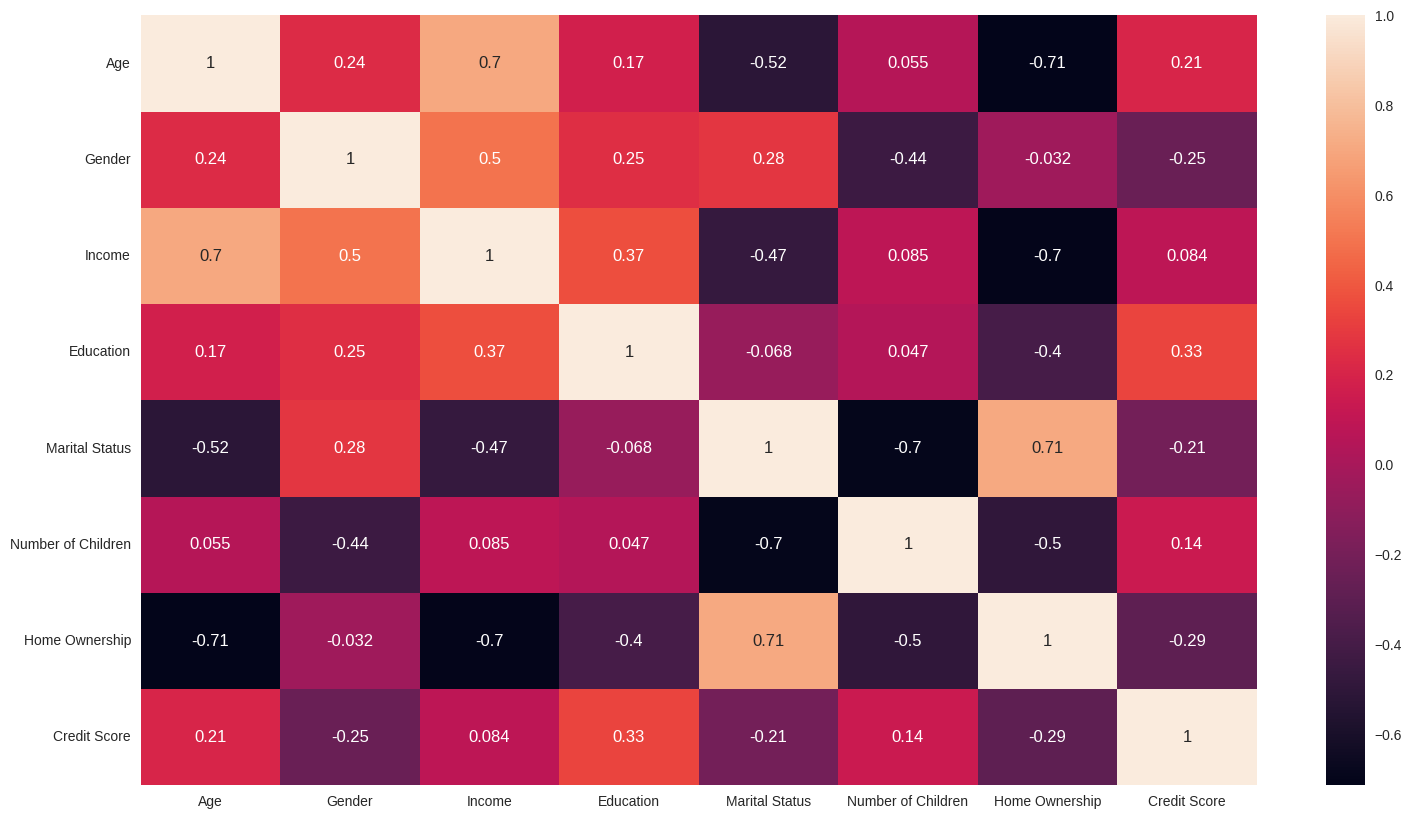

In [14]:
# Set the size of figure to 12 by 10.
plt.figure(figsize=(18,10))

sns.heatmap(df.corr(), annot = True)

In [15]:
# Count the number of instances in each class
class_counts = df['Credit Score'].value_counts()

# Print the class distribution
print('Class distribution:')
print(class_counts)

Class distribution:
Credit Score
1    113
0     36
2     15
Name: count, dtype: int64


In [16]:
X = df.drop('Credit Score', axis = 1)
y = df['Credit Score']
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from imblearn.over_sampling import SMOTE

# Instantiate SMOTE
sm = SMOTE(random_state=42)

# Fit SMOTE to training data
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

# Print class distribution of original and resampled data
print('Class distribution before resampling:', y_train.value_counts())
print('Class distribution after resampling:', y_train_res.value_counts())

Class distribution before resampling: Credit Score
1    90
0    31
2    10
Name: count, dtype: int64
Class distribution after resampling: Credit Score
1    90
0    90
2    90
Name: count, dtype: int64


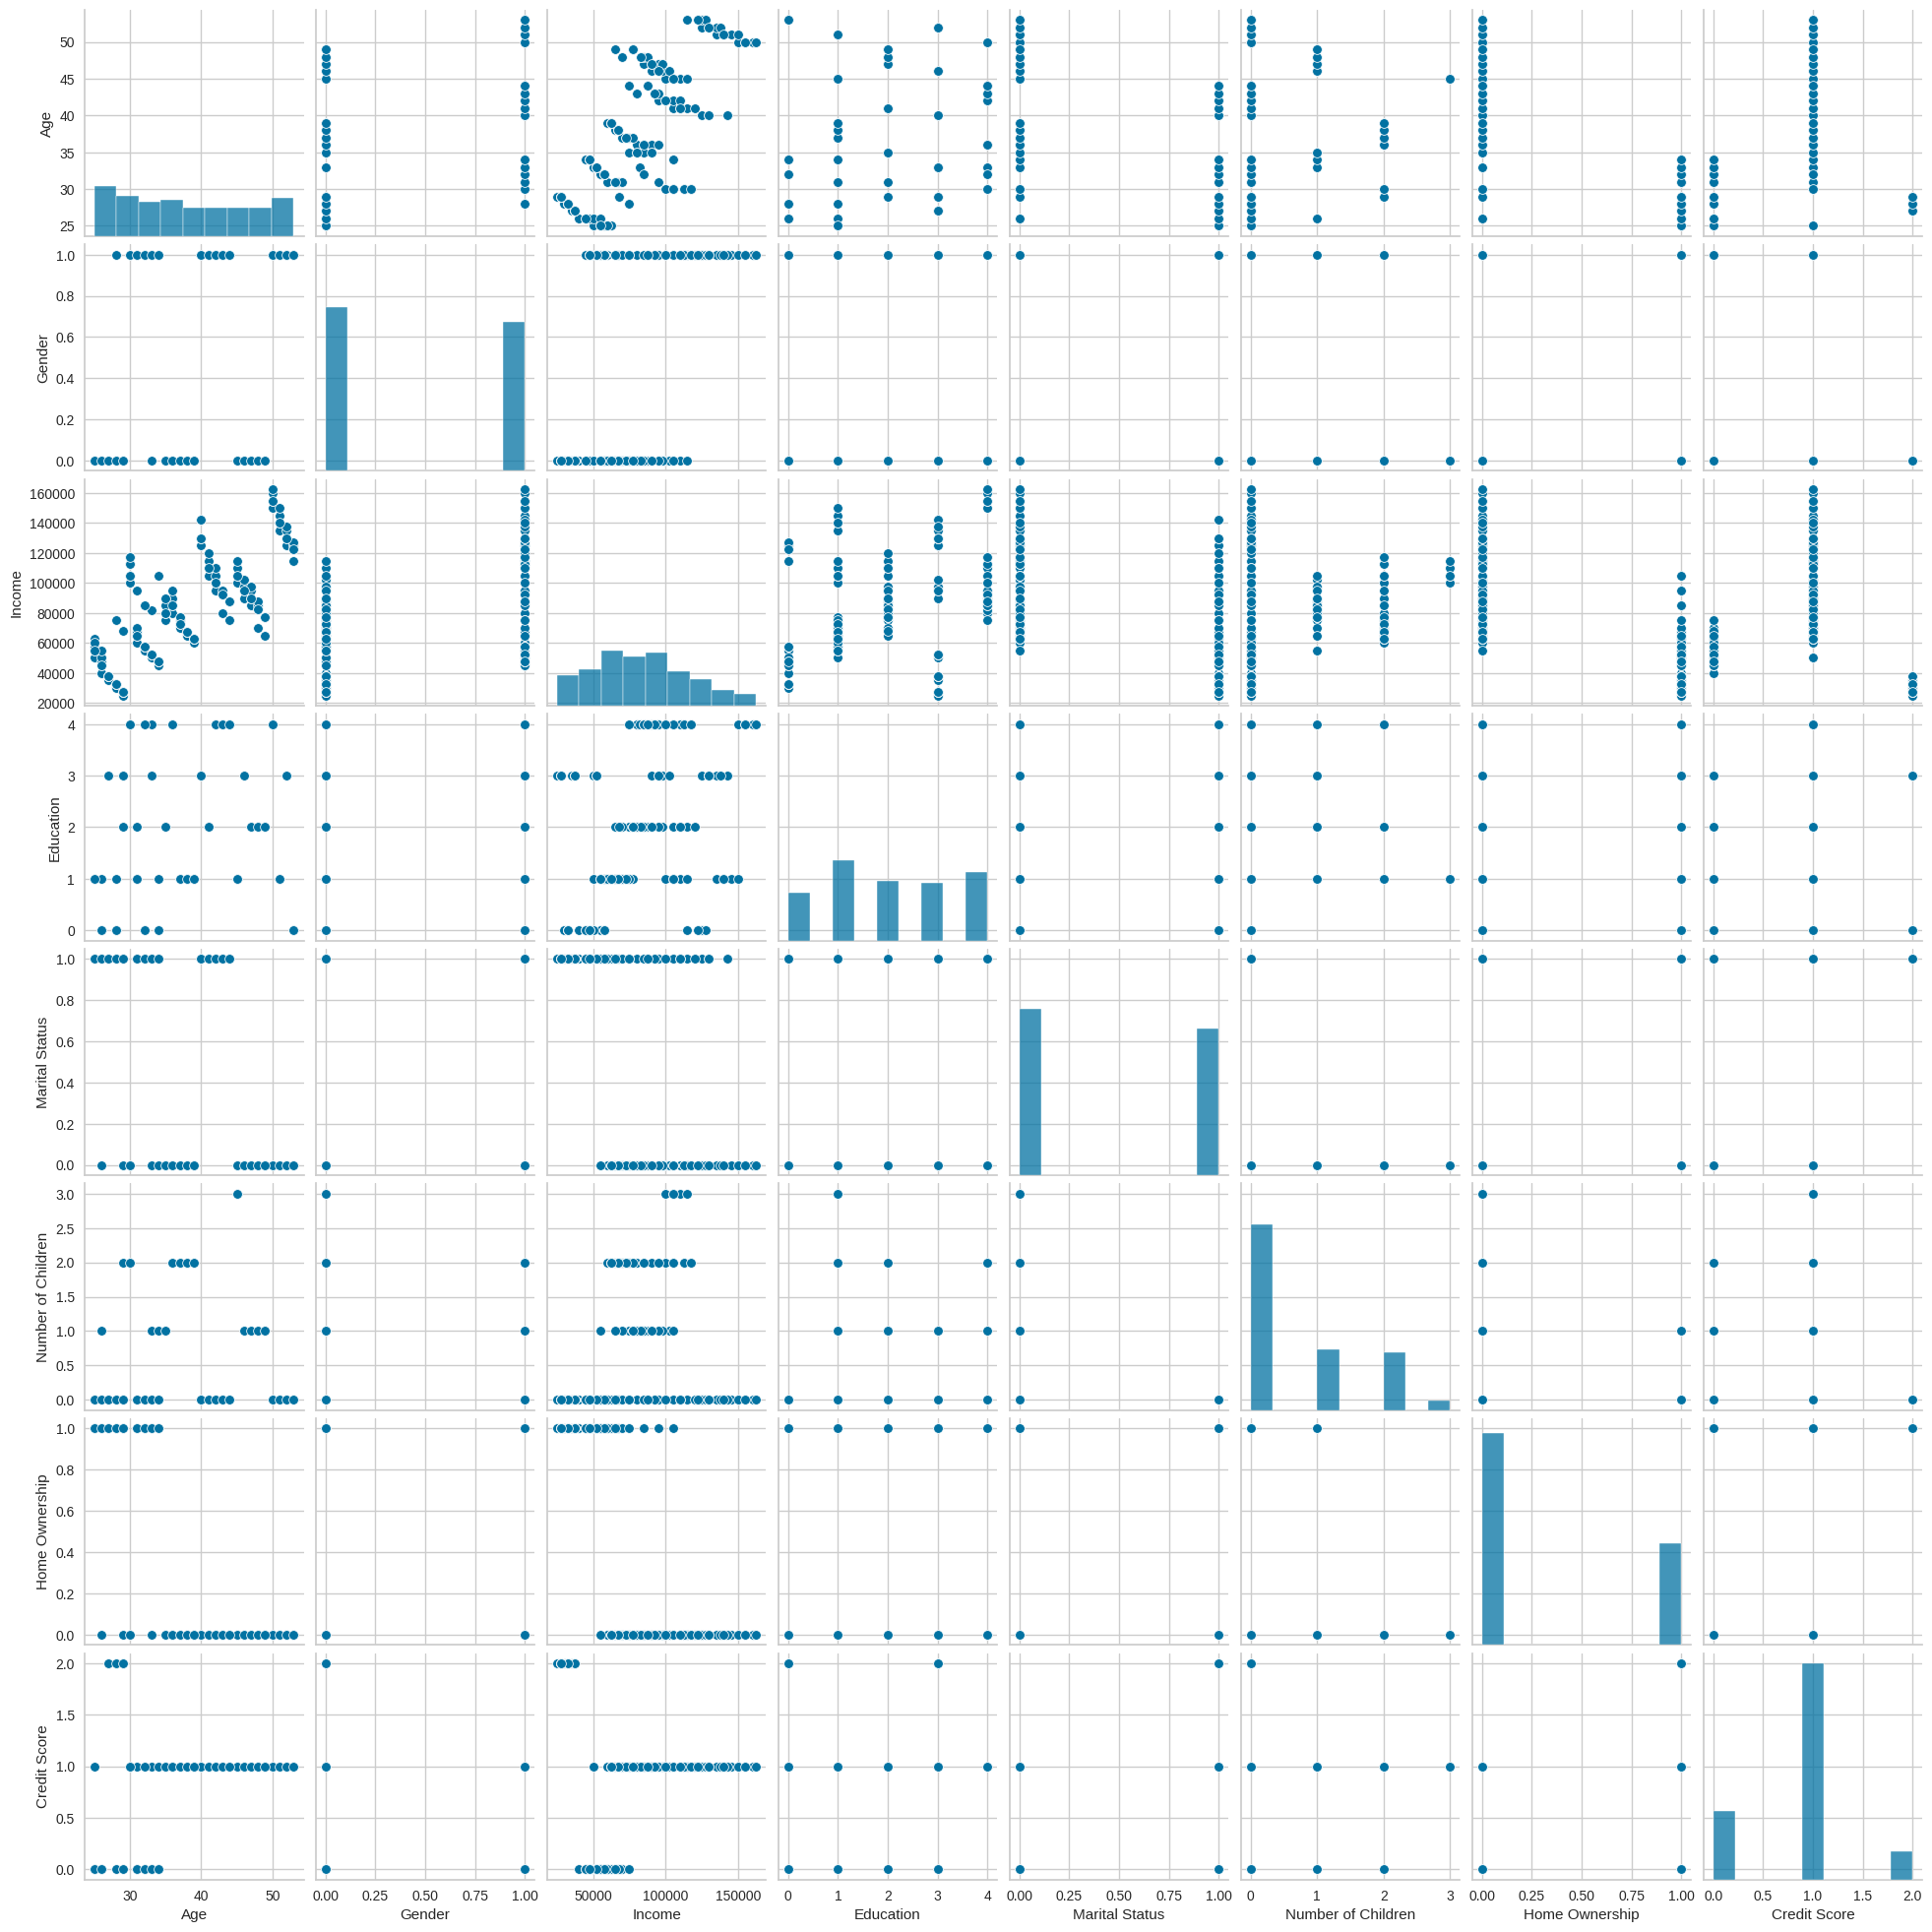

In [18]:
sns.pairplot(df)

In [19]:
# combine X_train_res and y_train_res
train_data = pd.concat([X_train_res, y_train_res], axis=1)

from pycaret.classification import *
s = setup(data=train_data, target='Credit Score', session_id=123, normalize=True)

,Description,Value
0,Session id,123
1,Target,Credit Score
2,Target type,Multiclass
3,Original data shape,"(270, 8)"
4,Transformed data shape,"(270, 8)"
5,Transformed train set shape,"(189, 8)"
6,Transformed test set shape,"(81, 8)"
7,Numeric features,7
8,Preprocess,True
9,Imputation type,simple


In [20]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.9789,0.9840,0.9789,0.9818,0.9787,0.9683,0.9698,0.1070
rf,Random Forest Classifier,0.9789,0.9956,0.9789,0.9818,0.9788,0.9683,0.9698,0.2180
gbc,Gradient Boosting Classifier,0.9789,0.0000,0.9789,0.9818,0.9788,0.9683,0.9698,0.3840
et,Extra Trees Classifier,0.9789,0.9963,0.9789,0.9818,0.9788,0.9683,0.9698,0.1660
lr,Logistic Regression,0.9737,0.0000,0.9737,0.9773,0.9735,0.9604,0.9623,0.9370
dt,Decision Tree Classifier,0.9737,0.9801,0.9737,0.9773,0.9735,0.9604,0.9623,0.0430
xgboost,Extreme Gradient Boosting,0.9737,0.9920,0.9737,0.9773,0.9735,0.9604,0.9623,0.2660
lightgbm,Light Gradient Boosting Machine,0.9737,0.9924,0.9737,0.9773,0.9735,0.9604,0.9623,0.3510
svm,SVM - Linear Kernel,0.9684,0.0000,0.9684,0.9722,0.9682,0.9525,0.9547,0.0470
ada,Ada Boost Classifier,0.9526,0.0000,0.9526,0.9628,0.9509,0.9284,0.9345,0.1260


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')

In [21]:
knn = create_model('knn')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9474,0.9583,0.9474,0.9539,0.9467,0.9205,0.9244
1,0.9474,0.9583,0.9474,0.9539,0.9467,0.9205,0.9244
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,0.9474,0.9615,0.9474,0.9549,0.9470,0.9208,0.9247
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,0.9474,0.9615,0.9474,0.9549,0.9470,0.9208,0.9247
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [22]:
preds = predict_model(knn)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,K Neighbors Classifier,0.9753,0.9907,0.9753,0.9770,0.9753,0.9630,0.9638


In [23]:
preds

,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership,Credit Score,prediction_label,prediction_score
140,29,0,47500,0,1,0,1,0,0,1.0
268,27,0,32785,0,1,0,1,2,2,1.0
228,27,0,37500,3,1,0,1,2,2,1.0
205,28,0,32500,0,1,0,1,2,2,1.0
103,43,1,92500,4,1,0,0,1,1,1.0
...,...,...,...,...,...,...,...,...,...,...
11,29,0,68000,2,0,2,0,0,1,1.0
246,28,0,32148,0,1,0,1,2,2,1.0
238,28,0,32037,0,1,0,1,2,2,1.0
85,27,0,37500,3,1,0,1,2,2,1.0


In [24]:
from sklearn.model_selection import cross_val_score

# Evaluate the ensemble model using cross-validation
scores = cross_val_score(knn, X_train_res, y_train_res, cv=20)

In [25]:
preds = predict_model(knn)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,K Neighbors Classifier,0.9753,0.9907,0.9753,0.9770,0.9753,0.9630,0.9638


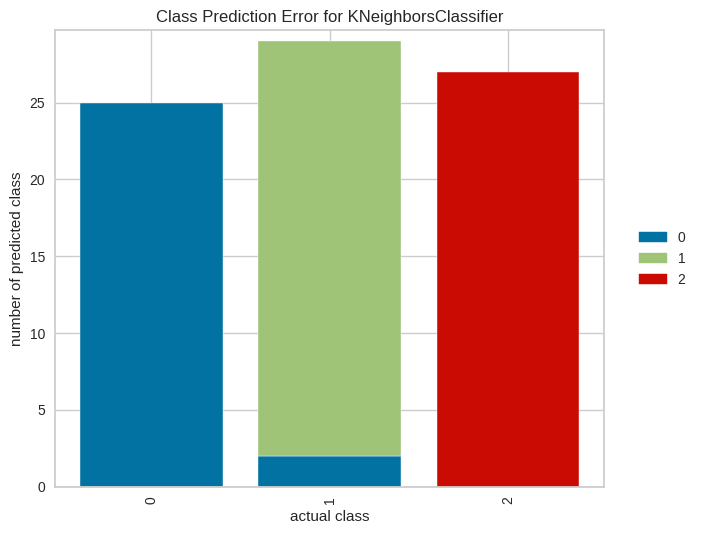

In [26]:
plot_model(knn, plot = 'error')

In [27]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier()


# Fit the Extra Trees Classifier object to the dataset

clf.fit(X_train_res, y_train_res)

scores = cross_val_score(knn, X_train_res, y_train_res, cv=20)

# Predict the labels for the test data
y_preds = clf.predict(X_test)

In [28]:
from sklearn.metrics import classification_report, confusion_matrix
print("Classification Report")
print(classification_report(y_test, y_preds))

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00        23
           2       1.00      1.00      1.00         5

    accuracy                           1.00        33
   macro avg       1.00      1.00      1.00        33
weighted avg       1.00      1.00      1.00        33



In [29]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_preds))

Confusion Matrix:
[[ 5  0  0]
 [ 0 23  0]
 [ 0  0  5]]
